#### Let give some visualization for dataset, therefore we can understand throughly

In [14]:
from IPython.display import Image

import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import math

## Sobel Edge Detection

For edge detection algorithms to work well, we first need to smooth the image to remove noise. We can use the cv2.GaussianBlur() function to smooth the image. The function cv2.Sobel() allows calculating the derivative in the vertical and horizontal directions of the image. To synthesize the results, we take the average of the derivatives in the two directions at each pixel. In the end, Sobel will highlight the edges, and the noise will become fainter, so we choose a threshold to remove these low-brightness pixels.

In [3]:
def basic_sobel_edge_detection(image_path, blur_ksize=5, sobel_ksize=1, skipping_threshold=30):
    img = cv2.imread(image_path) #Đọc ảnh đầu vào
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Chuyển ảnh thành ảnh đa mức xám
    img_gaussian = cv2.GaussianBlur(gray, (blur_ksize, blur_ksize),0) #Lọc ảnh đa mức xám bằng bộ lọc Gauss với kích thước phụ thuộc vào blur_ksize 

    #sobel
    img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=sobel_ksize)
    img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=sobel_ksize) #Thực hiện Sobel theo phương y, tương tự theo phương x

    img_sobel = cv2.addWeighted(img_sobelx, 0.5, img_sobely, 0.5, 0) #Tổng hợp ảnh Sobel từ phương x và y
    
    #Cắt ngưỡng 
    for i in range(img_sobel.shape[0]):
        for j in range(img_sobel.shape[1]):
            if img_sobel[i][j] < skipping_threshold:
                img_sobel[i][j] = 0
            else:
                img_sobel[i][j] = 255
    return img_sobel

Let's test the random image

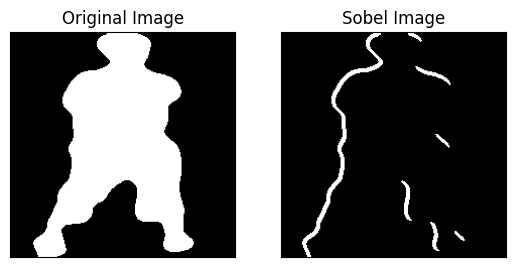

In [5]:
image_path = "OULP-C1V2_Pack/OULP-C1V2_NormalizedSilhouette(224x224)_openMedianBlur/Seq00/0000024/00000037.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

img_sobel = basic_sobel_edge_detection(image_path, 7, 1, 30)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_sobel,cmap = 'gray')
plt.title('Sobel Image'), plt.xticks([]), plt.yticks([])
plt.show()

- We'll use CV_64F instead of CV_8U to improve quality
- Then use two functions np.absolute() and np.uint8() to return to the original data type

In [6]:
def sobel_edge_detection(image_path, blur_ksize=7, sobel_ksize=1, skipping_threshold=30):
    img = cv2.imread(image_path) #Đọc ảnh đầu vào
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Chuyển ảnh thành ảnh đa mức xám
    img_gaussian = cv2.GaussianBlur(gray, (blur_ksize, blur_ksize),0) #Lọc ảnh đa mức xám bằng bộ lọc Gauss với kích thước phụ thuộc vào blur_ksize 

    #sobel
    img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_64F,1,0,ksize=sobel_ksize)
    img_sobely = cv2.Sobel(img_gaussian,cv2.CV_64F,0,1,ksize=sobel_ksize) #Thực hiện Sobel theo phương y, tương tự theo phương x

    img_sobelx = np.abs(img_sobelx).astype(np.uint8)
    img_sobely = np.abs(img_sobely).astype(np.uint8)
    
    img_sobel = cv2.addWeighted(img_sobelx, 0.5, img_sobely, 0.5, 0) #Tổng hợp ảnh Sobel từ phương x và y

    pass
    
    return img_sobel

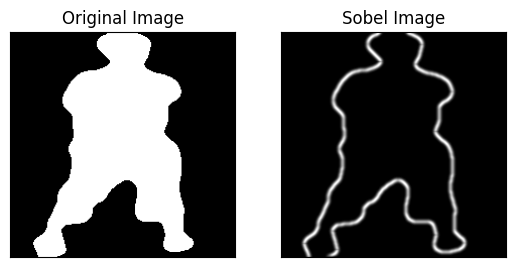

In [8]:
image_path = "OULP-C1V2_Pack/OULP-C1V2_NormalizedSilhouette(224x224)_openMedianBlur/Seq00/0000024/00000037.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

img_sobel = sobel_edge_detection(image_path, 7, 1, 30)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_sobel,cmap = 'gray')
plt.title('Sobel Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Prewitt Edge Detection

In [10]:
def prewitt_edge_detection(image_path, blur_ksize = 5, skipping_threshold=30):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Chuyển ảnh thành ảnh đa mức xám
    img_gaussian = cv2.GaussianBlur(gray, (blur_ksize, blur_ksize),0) #Lọc ảnh đa mức xám bằng bộ lọc Gauss với kích thước phụ thuộc vào blur_ksize 

    #prewitt
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
    img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
    img_prewitt1 = (img_prewittx + img_prewitty)/2
    
    kernelx2 = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
    kernely2 = np.array([[1,0,-1], [1,0,-1],[1,0,-1]])
    img_prewittx2 = cv2.filter2D(img_gaussian, -1, kernelx2)
    img_prewitty2 = cv2.filter2D(img_gaussian, -1, kernely2)
    img_prewitt2 = (img_prewittx2 + img_prewitty2)/2
    
    img_prewitt = (img_prewitt1 + img_prewitt2)/2
    for i in range(img_prewitt.shape[0]):
        for j in range(img_prewitt.shape[1]):
            if img_prewitt[i][j] < skipping_threshold:
                img_prewitt[i][j] = 0
            else:
                img_prewitt[i][j] = 255
    return img_prewitt

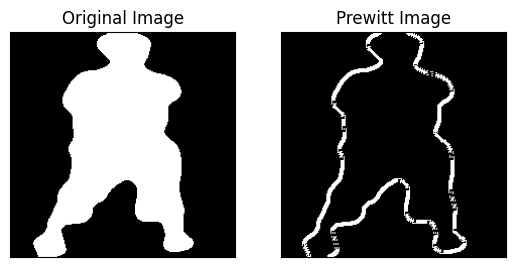

In [11]:
image_path = "OULP-C1V2_Pack/OULP-C1V2_NormalizedSilhouette(224x224)_openMedianBlur/Seq00/0000024/00000037.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

img_sobel = prewitt_edge_detection(image_path, 5, 30)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_sobel,cmap = 'gray')
plt.title('Prewitt Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Distribution of Sobel edge detection

We'll count the number of pixels on each boundary (perimeter) from the results above and draw the distribution of the perimeter of each varieties (using data from subject_ID 0000024 and use 40 images). 

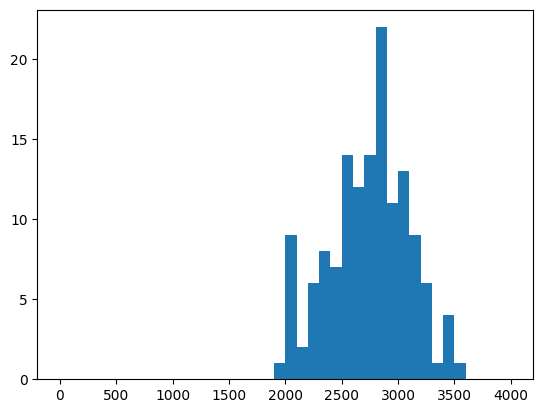

In [12]:
image_dir = 'OULP-C1V2_Pack/OULP-C1V2_NormalizedSilhouette(224x224)_openMedianBlur/Seq00/0000024/'
list_c = []
for file in os.listdir(image_dir):
    image_path = os.path.join(image_dir, file)
    skipping_threshold = 40
    img_sobel = sobel_edge_detection(image_path, skipping_threshold=skipping_threshold)
    perimeter = 0
    for i in range(img_sobel.shape[0]):
        for j in range(img_sobel.shape[1]):
            if img_sobel[i][j] >= skipping_threshold:
                perimeter += 1
    list_c.append(perimeter)
plt.hist(list_c, 40, [0, 4000]); plt.show()

## Distribution of Prewitt edge detection
The same as Sobel edge detection

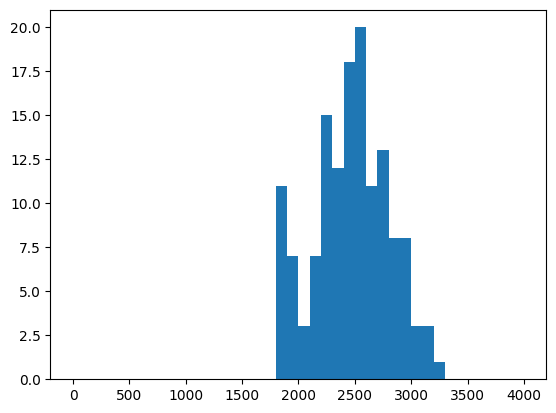

In [13]:
image_dir = 'OULP-C1V2_Pack/OULP-C1V2_NormalizedSilhouette(224x224)_openMedianBlur/Seq00/0000024/'
list_c = []
for file in os.listdir(image_dir):
    image_path = os.path.join(image_dir, file)
    skipping_threshold = 40
    img_prewitt = prewitt_edge_detection(image_path, skipping_threshold=skipping_threshold)
    perimeter = 0
    for i in range(img_prewitt.shape[0]):
        for j in range(img_prewitt.shape[1]):
            if img_prewitt[i][j] >= skipping_threshold:
                perimeter += 1
    list_c.append(perimeter)
plt.hist(list_c, 40, [0, 4000]); plt.show()

## Frequency Domain

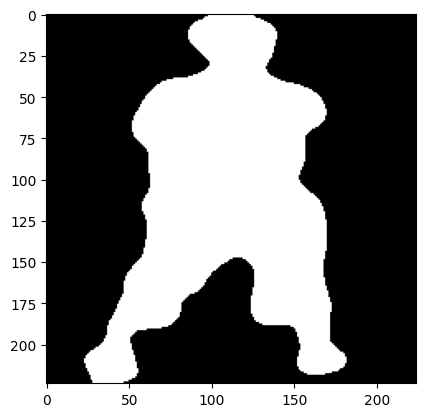

In [15]:
# read input as grayscale
img = cv2.imread('OULP-C1V2_Pack/OULP-C1V2_NormalizedSilhouette(224x224)_openMedianBlur/Seq00/0000024/00000037.png', 0)
plt.imshow(img, cmap='gray')
plt.show()

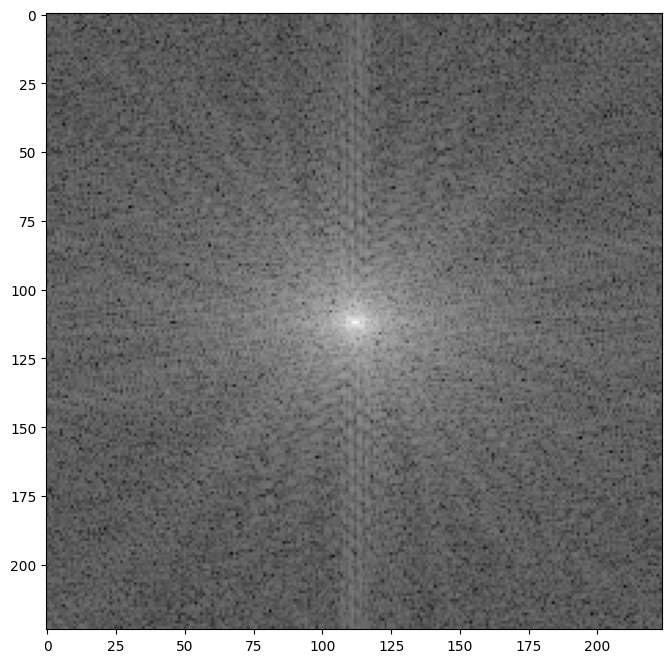

In [16]:
# convert image to floats and do dft saving as complex output
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)

# apply shift of origin from upper left corner to center of image
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
fig = plt.figure(figsize=(8,8))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

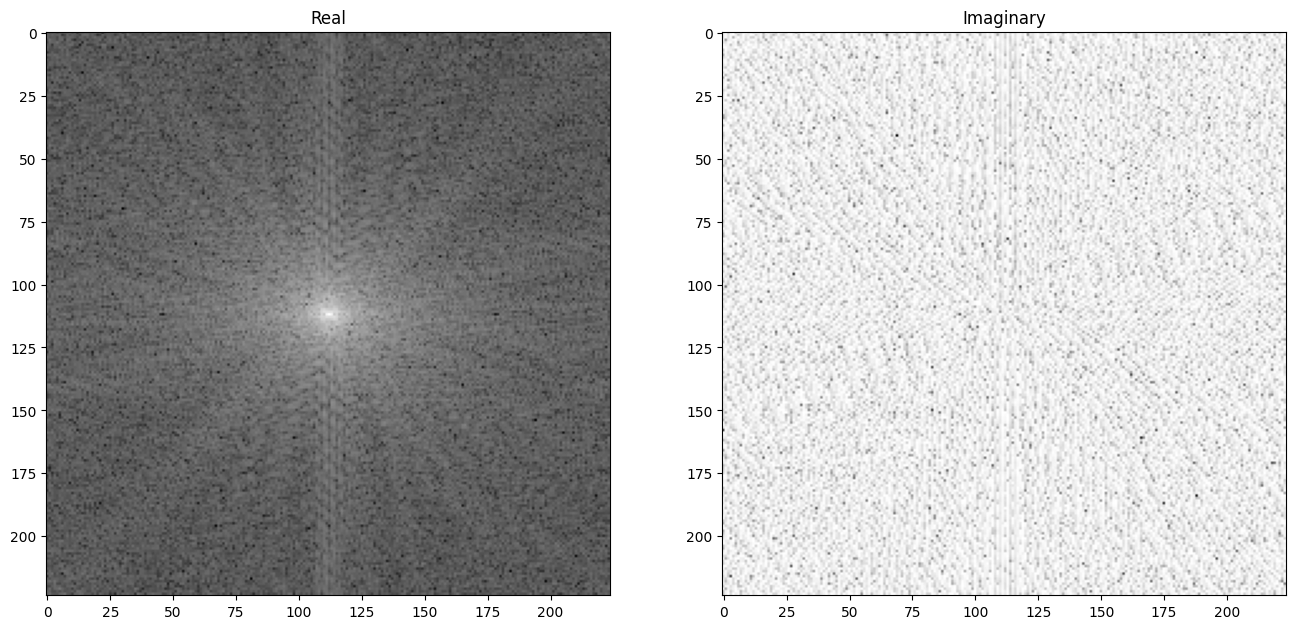

In [17]:
# display real and imaginary components
real, imag = cv2.cartToPolar(dft_shift[:,:,0],dft_shift[:,:,1])

real = np.log(real) / 30
imag = np.log(imag) / 30

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
ax1.title.set_text('Real')
plt.imshow(real, cmap='gray')
ax2 = fig.add_subplot(122)
ax2.title.set_text('Imaginary')
plt.imshow(imag, cmap='gray')
plt.show()

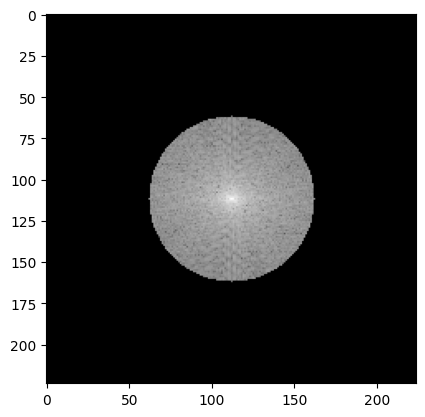

In [18]:
# low pass filter example
center = np.array(img.shape)/2
rad = 50
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if np.linalg.norm(np.array((i,j)) - center) > rad:
            magnitude_spectrum[i,j] = 0
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

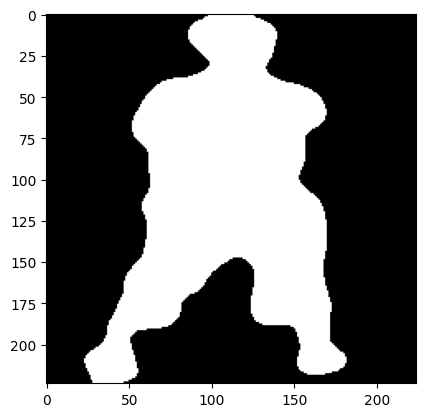

In [19]:
# shift origin from center to upper left corner
back_ishift = np.fft.ifftshift(dft_shift)

# do idft saving as complex output
img_back = cv2.idft(back_ishift)

# combine complex components into original image again
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

# re-normalize to 8-bits
img_back = cv2.normalize(img_back, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

plt.imshow(img_back, cmap='gray')
plt.show()

#### Sine noise removal (manual)

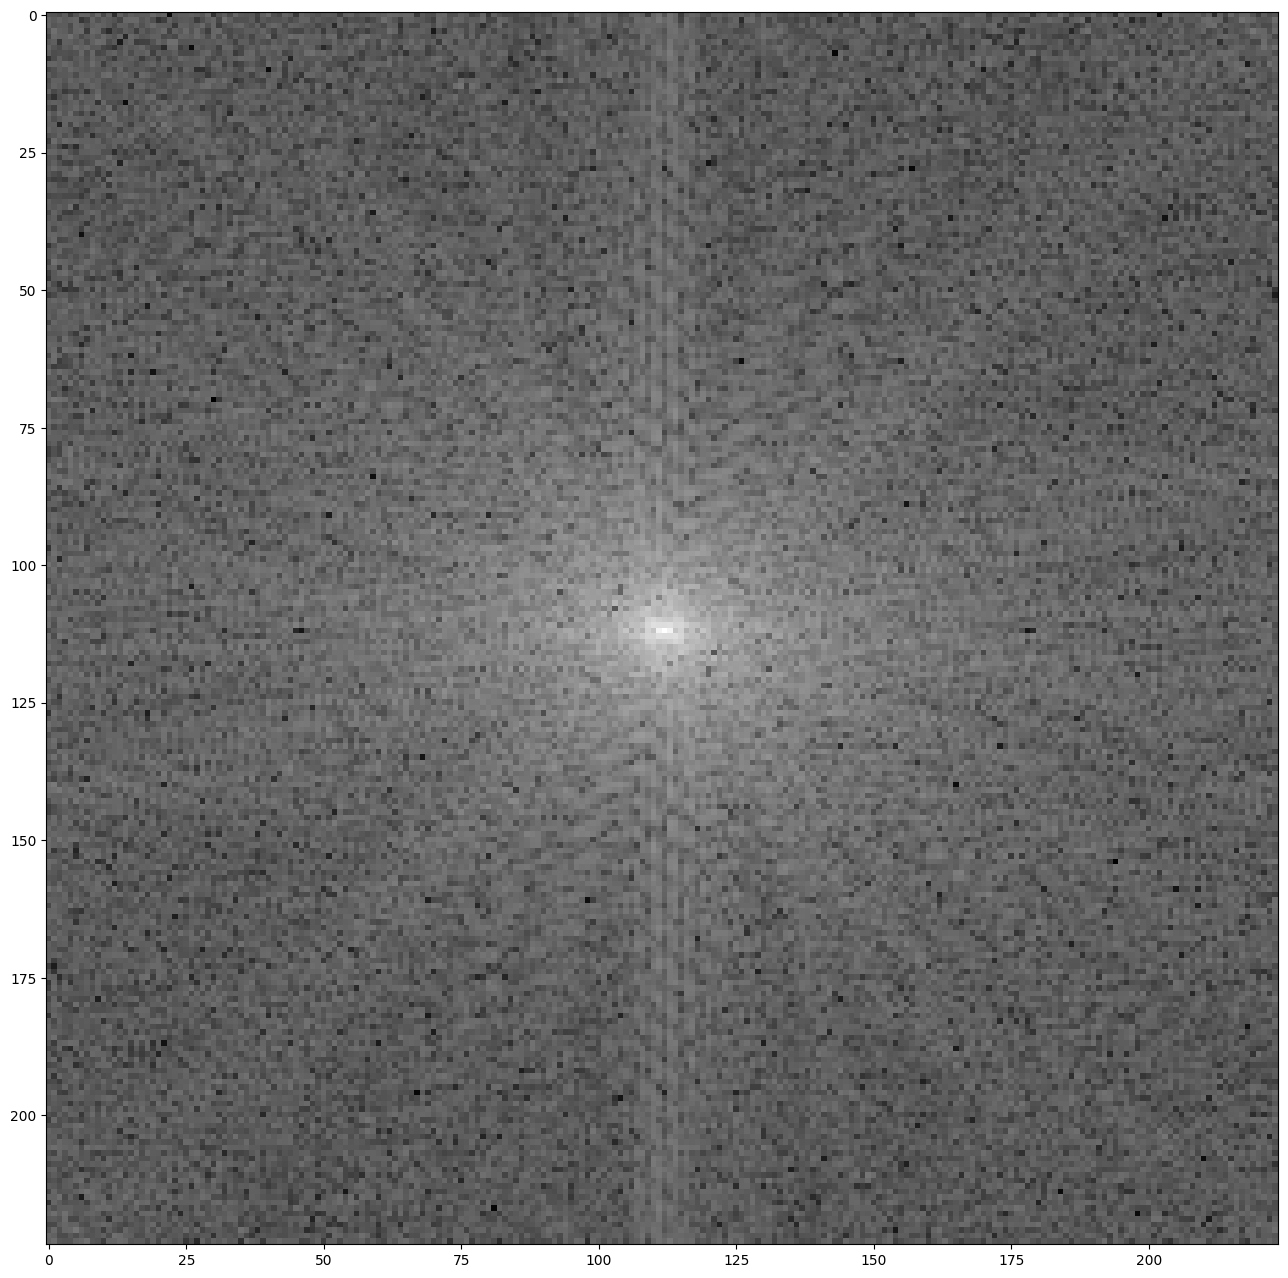

In [20]:
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.figure(figsize=(16,16))
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.show()

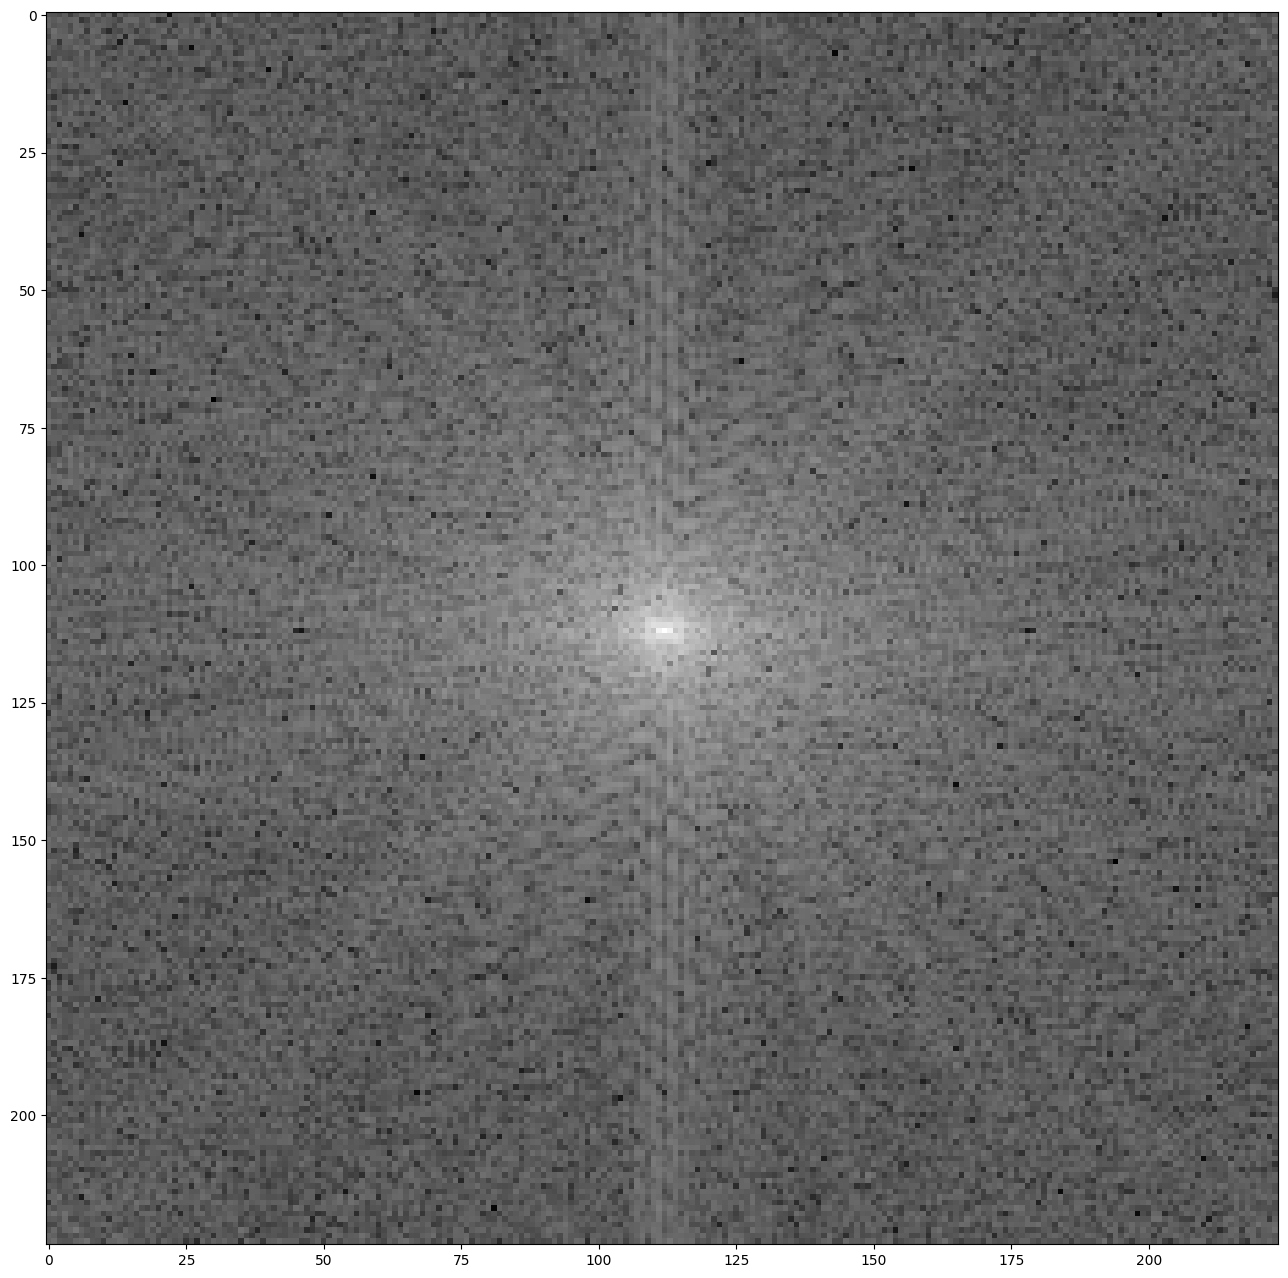

In [21]:
dft_shift[227:233, 236:242] = 255
dft_shift[227:233, 219:225] = 255
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.figure(figsize=(16,16))
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.show()

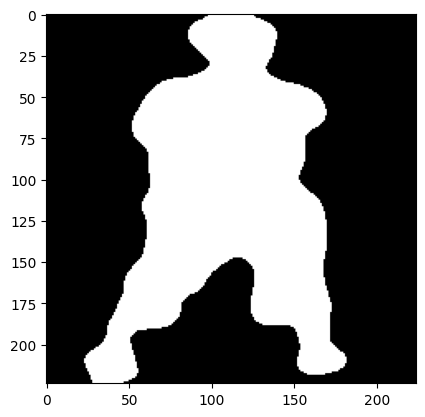

In [22]:
dft_ishift = np.fft.ifftshift(dft_shift)
idft = cv2.idft(dft_ishift)
img_back = cv2.magnitude(idft[:,:,0],idft[:,:,1])
plt.imshow(img_back, cmap = 'gray')
plt.show()

### Low pass filter

In [23]:
def get_ideal_low_pass_filter(shape, cutoff):
    """Computes a Ideal low pass mask
    takes as input:
    shape: the shape of the mask to be generated
    cutoff: the cutoff frequency of the ideal filter
    returns a ideal low pass mask"""

    d0 = cutoff
    rows, columns = shape
    mask = np.zeros((rows, columns), dtype=int)
    mid_R, mid_C = int(rows/2), int(columns/2)
    for i in range(rows):
        for j in range(columns):
            d = math.sqrt((i - mid_R)**2 + (j - mid_C)**2)
            if d <= d0:
                mask[i, j] = 1
            else:
                mask[i, j] = 0

    return mask

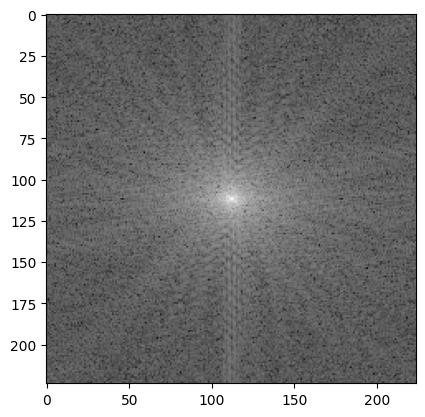

In [24]:
input_image = cv2.imread('OULP-C1V2_Pack/OULP-C1V2_NormalizedSilhouette(224x224)_openMedianBlur/Seq00/0000024/00000037.png', 0)

fft = np.fft.fft2(input_image)
shift_fft = np.fft.fftshift(fft)

# showing purpose only
mag_dft = np.log(np.abs(shift_fft))
plt.imshow(mag_dft, cmap='gray')
plt.show()

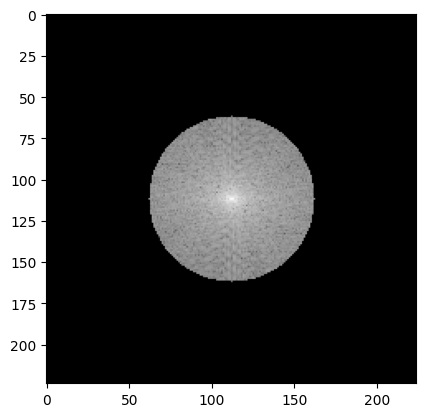

In [25]:
shape = np.shape(input_image)
cutoff = 50
mask = get_ideal_low_pass_filter(shape,cutoff)

filtered_image = np.multiply(mask, shift_fft)

# showing purpose only
mag_filtered_dft = np.log(np.abs(filtered_image)+1)
plt.imshow(mag_filtered_dft, cmap='gray')
plt.show()

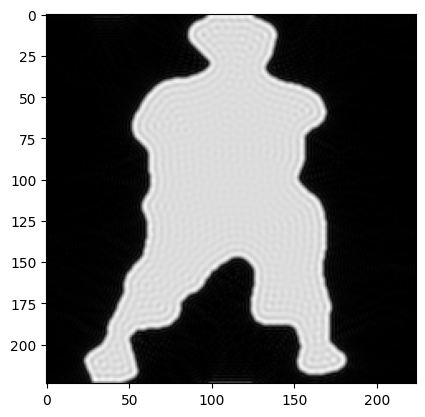

In [26]:
shift_ifft = np.fft.ifftshift(filtered_image)
ifft = np.fft.ifft2(shift_ifft)
mag = np.abs(ifft)
plt.imshow(mag, cmap='gray')
plt.show()

### High pass filter

In [27]:
def get_ideal_high_pass_filter(shape, cutoff):
    """Computes a Ideal high pass mask
    takes as input:
    shape: the shape of the mask to be generated
    cutoff: the cutoff frequency of the ideal filter
    returns a ideal high pass mask"""

    d0 = cutoff
    
    mask = 1 - get_ideal_low_pass_filter(shape, d0)
    
    
    return mask

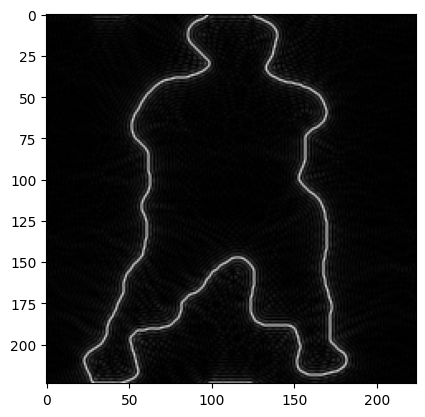

In [28]:
### YOUR CODE HERE ###
input_image = cv2.imread('OULP-C1V2_Pack/OULP-C1V2_NormalizedSilhouette(224x224)_openMedianBlur/Seq00/0000024/00000037.png', 0)

fft = np.fft.fft2(input_image)
shift_fft = np.fft.fftshift(fft)
shape = np.shape(input_image)

cutoff = 50
mask = get_ideal_high_pass_filter(shape, cutoff)
filtered_image = np.multiply(mask, shift_fft)
shift_ifft = np.fft.ifftshift(filtered_image)
ifft = np.fft.ifft2(shift_ifft)

# showing purpose only
mag = np.abs(ifft)
plt.imshow(mag, cmap='gray')
plt.show()

### Band pass filter

In [29]:
def get_ideal_band_pass_filter(shape, cutoff1, cutoff2):
    """Computes a Ideal band pass mask
    takes as input:
    shape: the shape of the mask to be generated
    cutoff1, cutoff2: the cutoff frequency of the ideal filter
    returns a ideal band pass mask"""

    rows, columns = shape
    mask = np.zeros((rows, columns), dtype=int)
    mid_R, mid_C = int(rows/2), int(columns/2)
    for i in range(rows):
        for j in range(columns):
            d = math.sqrt((i - mid_R)**2 + (j - mid_C)**2)
            if (d >= cutoff1) and (d <= cutoff2):
                mask[i, j] = 1
            else:
                mask[i, j] = 0

    return mask

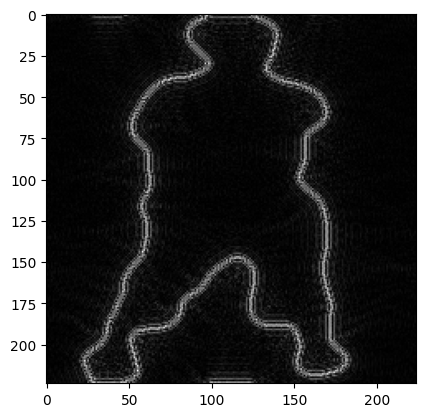

In [30]:
input_image = cv2.imread('OULP-C1V2_Pack/OULP-C1V2_NormalizedSilhouette(224x224)_openMedianBlur/Seq00/0000024/00000037.png', 0)

fft = np.fft.fft2(input_image)
shift_fft = np.fft.fftshift(fft)
shape = np.shape(input_image)

cutoff1 = 50
cutoff2 = 100
mask = get_ideal_band_pass_filter(shape, cutoff1, cutoff2)
filtered_image = np.multiply(mask, shift_fft)
shift_ifft = np.fft.ifftshift(filtered_image)
ifft = np.fft.ifft2(shift_ifft)

# showing purpose only
mag = np.abs(ifft)
plt.imshow(mag, cmap='gray')
plt.show()

### Gaussian low pass filter
Create a mask for low-pass filtering in the frequency domain in the form of a Gaussian function

$$\Large mask[i, j] = e^{-\frac{d^2}{2\times{d0^2}}}$$

In [31]:
def get_gaussian_low_pass_filter(shape, cutoff):
    """Computes a gaussian low pass mask
    takes as input:
    shape: the shape of the mask to be generated
    cutoff: the cutoff frequency of the gaussian filter (sigma)
    returns a gaussian low pass mask"""
    
    d0 = cutoff
    rows, columns = shape
    mask = np.zeros((rows, columns))
    mid_R, mid_C = int(rows / 2), int(columns / 2)
    for i in range(rows):
        for j in range(columns):
            d = math.sqrt((i - mid_R) ** 2 + (j - mid_C) ** 2)
            mask[i, j] = np.exp(-(d * d) / (2 * d0 * d0))

    return mask

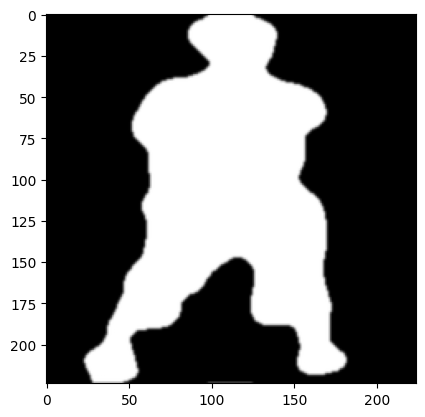

In [32]:
input_image = cv2.imread('OULP-C1V2_Pack/OULP-C1V2_NormalizedSilhouette(224x224)_openMedianBlur/Seq00/0000024/00000037.png', 0)

fft = np.fft.fft2(input_image)
shift_fft = np.fft.fftshift(fft)
shape = np.shape(input_image)

cutoff = 50
mask = get_gaussian_low_pass_filter(shape, cutoff)
filtered_image = np.multiply(mask, shift_fft)
shift_ifft = np.fft.ifftshift(filtered_image)
ifft = np.fft.ifft2(shift_ifft)

# showing purpose only
mag = np.abs(ifft)
plt.imshow(mag, cmap='gray')
plt.show()